<a href="https://colab.research.google.com/github/spe301/311-analysis/blob/main/gradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt 

df = pd.read_csv('https://raw.githubusercontent.com/spe301/dsc-phase-2-project-online/master/data/kc_house_data.csv')

In [ ]:
x = df['sqft_living']
y = df['price']

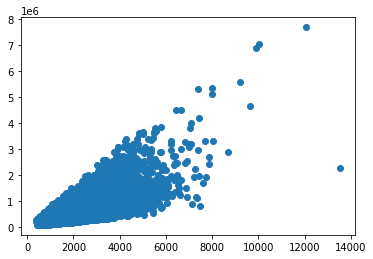

In [ ]:
plt.scatter(x, y)

In [ ]:
m = 500
b = 50000

In [ ]:
def error(x, y, b, m):
  n = len(x)
  error = 0
  for i in range(n):
    yhat = (m*x[i]) + b
    error += abs(yhat - y[i])/n # We incrementally increase error, we use abs so that negatives and positives don't cancel out
  return error

error(x, y, b, m)

561804.9508728054

In [ ]:
def step(x, y, b, m, alpha):
  derivB = b
  derivM = m
  n = len(x)
  for i in range(n):
    derivB += (-2/n) * (y[i] - ((m*x[i]) + b)) # -2/n times error
    derivM += (-2/n) * x[i] * (y[i] - ((m*x[i]) + b)) # -2/n times x times error
  newB = b - (derivB * alpha)
  newM = m - (derivM * alpha)
  return [newB, newM]

In [ ]:
step(x, y, b, m, 0.000000001)

[49999.998850271295, 497.342797559985]

In [ ]:
alpha = 1e-9

In [ ]:
def gradientDescent(x, y, b, m, alpha, steps):
  b = b
  m = m
  results = {'beta': [], 'slope': [], 'error': []} #store these values in a dictionary for a neater output
  for i in range(steps):
    b, m = step(x, y, b, m, alpha)
    results['beta'].append(b)
    results['slope'].append(m)
    results['error'].append(error(x, y, b, m))
  return results


In [ ]:
results = pd.DataFrame(gradientDescent(x, y, b, m, alpha, 1000))

results

,beta,slope,error
0,49999.998850,497.342798,556619.197989
1,49999.997712,494.713074,551494.033680
2,49999.996584,492.110545,546429.033551
3,49999.995467,489.534929,541423.573428
4,49999.994361,486.985949,536478.796047
...,...,...,...
995,49999.816302,243.056216,172552.739450
996,49999.816222,243.056131,172552.700873
997,49999.816141,243.056047,172552.662696
998,49999.816060,243.055964,172552.624913


In [ ]:
results.loc[results['error'] == min(results['error'])]

,beta,slope,error
999,49999.81598,243.055882,172552.587521
